In [128]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.metrics import r2_score 

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [2]:
columns=["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body-style","drive_wheels",
"engine_location",
"wheel_base",
"length",
"width",
"height",
"curb_weight",
"engine-type",
"num-of_cylinders",
"engine_size",
"fuel_system",
"bore",
"stroke",
"compression_ratio",
"horsepower",
"peak_rpm",
"city_mpg",
"highway_mpg",
"price"]

In [3]:
data=pd.read_csv("datasets/imports-85.data",header=None,names=columns)

In [4]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body-style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [6]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body-style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine-type          0
num-of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

#### Identify missing values
In the  dataset, missing data comes with the question mark "?"

In [7]:
missing_data = data.loc[:]=='?'
missing_data.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body-style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing values in each column

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized_losses
False    164
True      41
Name: normalized_losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel_type
False    205
Name: fuel_type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num_of_doors
False    203
True       2
Name: num_of_doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive_wheels
False    205
Name: drive_wheels, dtype: int64

engine_location
False    205
Name: engine_location, dtype: int64

wheel_base
False    205
Name: wheel_base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb_weight
False    205
Name: curb_weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of_cylinders
False    205
Name: num-of_cylinders, dtype: int64

engine_size
False    205
Name: engine_size, dtype: int64

fuel_system
Fa

Each column has 205 rows of data and 7 columns containing missing data:

1. "normalized_losses": 41 missing data
2. "num_of_doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak_rpm": 2 missing data
7. "price": 4 missing data

need to  convert str->int
- normalized_losses
- bore
- horsepower
- peak_rmp
- price

### Deal with missing data

#### Cleaning the normalized losses field

In [9]:
# Find out number of records having '?' value for normalized losses
data['normalized_losses'].where(data['normalized_losses']=='?').count()

41

In [10]:
# Setting the missing value to mean of normalized losses and conver the datatype to integer
nl_missing= data['normalized_losses'].loc[data['normalized_losses']!='?']
nl_mean=nl_missing.astype(str).astype(int).mean()
nl_mean
#data['normalized_losses']=data['normalized_losses'].map({'?':nl_mean})
data['normalized_losses']=data['normalized_losses'].replace({'?':nl_mean}).astype(int)
data['normalized_losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized_losses, dtype: int64

#### Cleaning the price data

In [11]:
data['price'].where(data['price']=='?').count()

4

In [12]:
# Find out the number of values which are not numeric
data['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [13]:
# List out the values which are not numeric
data['price'].loc[data['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [14]:
#Setting the missing value to mean of price and convert the datatype to integer
price_missing= data['price'].loc[data['price']!='?']
price_mean=price_missing.astype(str).astype(int).mean()
price_mean
#data['price']=data['price'].apply({'?':nl_mean}).astype(int)
data['price']=data['price'].replace({'?':price_mean}).astype(int)
data['price'].head()


0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

#### Cleaning the horsepower

In [15]:
data['horsepower'].where(data['horsepower']=='?').count()

2

In [16]:
# Checking the numberic and replacing with mean value and conver the datatype to integer
data['horsepower'].str.isnumeric().value_counts()
horsepower = data['horsepower'].loc[data['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
data['horsepower'] = data['horsepower'].replace('?',hpmean).astype(int)


In [17]:
data['horsepower'] .head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

#### Cleaning bore

In [18]:
# Find out the number of invalid value
data['bore'].where(data['bore']=='?').count()

4

In [19]:
nl_missing= data['bore'].loc[data['bore']!='?']
nl_mean=nl_missing.astype(str).astype(float).mean()
nl_mean
#data['normalized_losses']=data['normalized_losses'].map({'?':nl_mean})
data['bore']=data['bore'].replace({'?':nl_mean}).astype(float)
data['bore'].head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [20]:
data['bore'].where(data['bore']=='?').count()

0

#### Cleaning the stroke

In [21]:
# Replace the non-number value to null and convert the datatype
data['stroke'] = pd.to_numeric(data['stroke'],errors='coerce')
data.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body-style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine-type           object
num-of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

#### Cleaning the peak rpm data

In [22]:
data['peak_rpm'].where(data['peak_rpm']=='?').count()

2

In [23]:
# Convert the non-numeric data to null and convert the datatype
data['peak_rpm'] = pd.to_numeric(data['peak_rpm'],errors='coerce')
data.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body-style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine-type           object
num-of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

#### Cleaning the num-of-doors data

In [24]:
# remove the records which are having the value '?'
#data['num_of_doors'].where(data['num_of_doors'] == '?').count()
data['num_of_doors'].value_counts()

four    114
two      89
?         2
Name: num_of_doors, dtype: int64

In [25]:
#data = data[data['num_of_doors'] != '?']
#data
#data['num_of_doors'].where(data['num_of_doors'] == '?').count()


We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [26]:
data['num_of_doors'].value_counts().idxmax()

'four'

In [27]:
#replace the_missing 'num-of-doors' values by the most frequent 
data['num_of_doors'].replace('?',"four",inplace=True)

In [28]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body-style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


### Exploratory Data Analysis ( EDA )

#### Univariate Analysis
##### Price : Target Variable

In [29]:
data.price.describe()

count      205.000000
mean     13207.126829
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

/home/sulochana/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

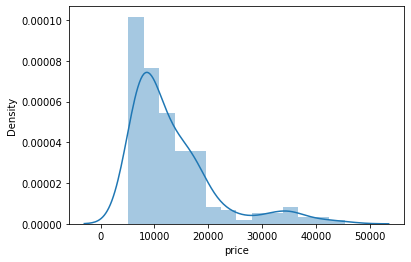

In [30]:
sns.distplot(data['price'])

 #### Inference
- Mean and median of price are significantly different.
- Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
- Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.

#### Symboling
- Its assigned insurance risk rating
- A value of +3 indicates that the auto is risky,
- -3 that it is probably pretty safe.
Let's see the count of automobile in each category and percent share of each category

/home/sulochana/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


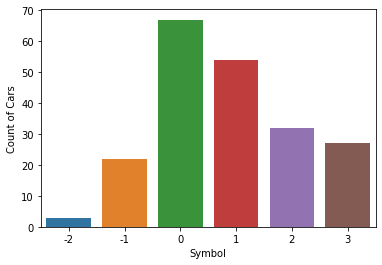

<Figure size 432x288 with 0 Axes>

In [31]:
plt1 = sns.countplot(data['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

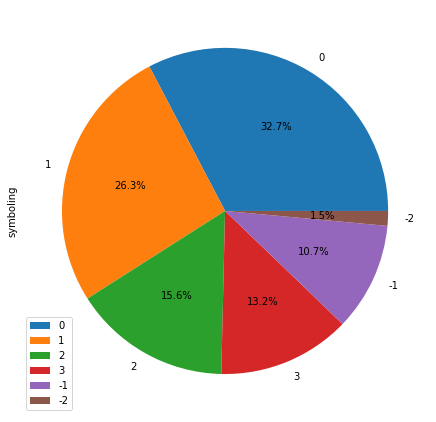

<Figure size 432x288 with 0 Axes>

In [32]:
df_sym = pd.DataFrame(data['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

Let's see average price of cars in each symbol category.

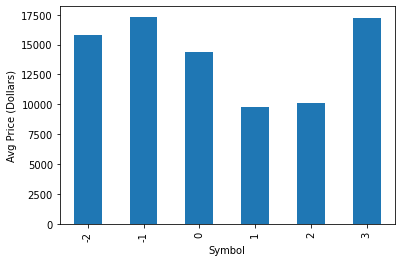

In [33]:
plt1 = data[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show()

#### Inference
- More than 50% of cars are with symbol 0 or 1.
- Average price of car is lower for 0,1 & 2 symbol category.

#### make(car name)

In [34]:
data.make.values[0:10]

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi'], dtype=object)

/home/sulochana/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


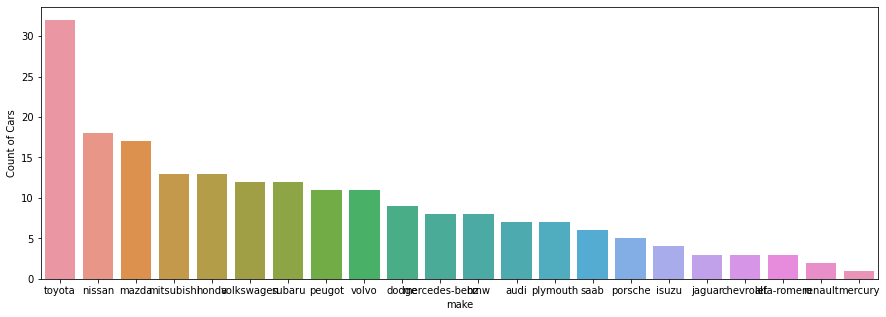

<Figure size 432x288 with 0 Axes>

In [35]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['make'], order=pd.value_counts(data['make']).index,)
plt1.set(xlabel = 'make', ylabel= 'Count of Cars')
#xticks(rotation = 90)
plt.show()
plt.tight_layout()

 It's noticed that in brand names,
- VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
- MAZDA is also spelled as MAXDA
- PORSCHE as PORSCHE and PORCSCHE.
- Let's fix these data issues.

In [36]:
data['make'] = data['make'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
data['make'] = data['make'].replace(['MAXDA'], 'MAZDA')
data['make'] = data['make'].replace(['PORCSHCE'], 'PORSCHE')
data['make'] = data['make'].replace(['TOYOUTA'], 'TOYOTA')

/home/sulochana/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


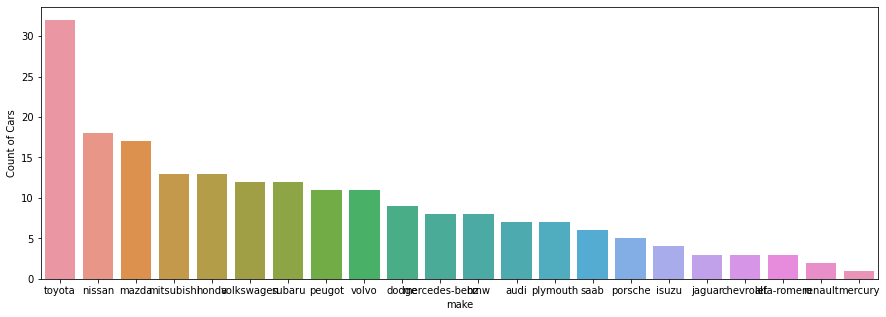

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['make'], order=pd.value_counts(data['make']).index,)
plt1.set(xlabel = 'make', ylabel= 'Count of Cars')
#xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [38]:
data.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

#### Inference
- Toyota, a Japanese company has the most no of models.

 Let's see average car price of each company.

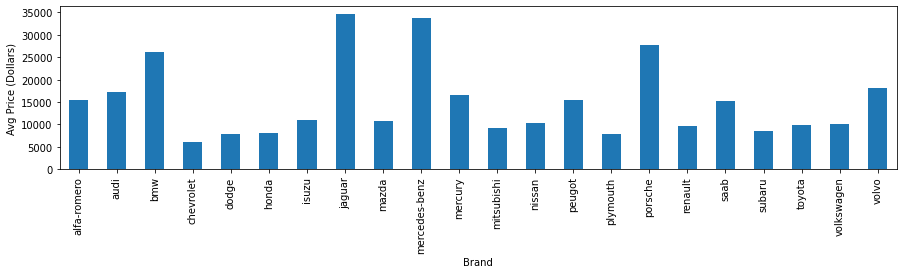

In [39]:
df_comp_avg_price = data[['make','price']].groupby("make", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'make', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 90)
plt.show()

In [40]:
data = data.merge(df_comp_avg_price, on = 'make')

In [41]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

#### Inference:
- Toyota has considerably high no of models in the market.
- Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.
- Some of the Luxury brans are

#### Fuel_type
Let's see how price varies with  Fuel Type

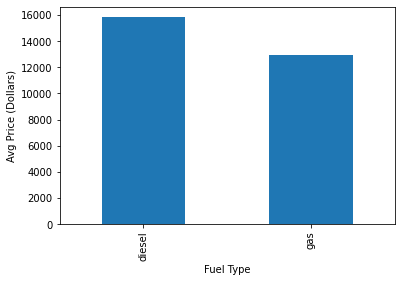

In [42]:
df_fuel_avg_price = data[['fuel_type','price']].groupby("fuel_type", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fuel_type', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show()

#### Inference
- Diesel cars are priced more than gas cars.

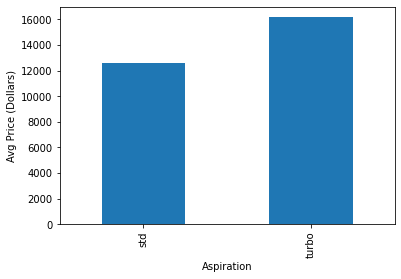

In [43]:
df_aspir_avg_price = data[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show()

#### Inference
- Cars with turbo aspiration engine are priced more than standard ones.

#### Door Numbers

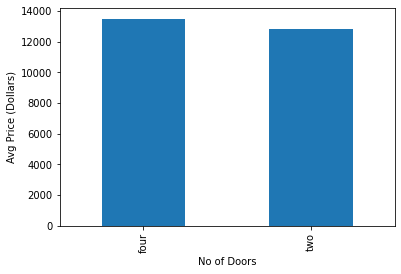

In [44]:
df_door_avg_price = data[['num_of_doors','price']].groupby("num_of_doors", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'num_of_doors', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show()

#### Inference
- Number of doors doesn't seem to have much effect on price.

#### Car Body

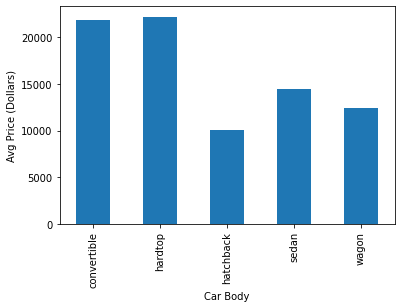

In [45]:
df_body_avg_price = data[['body-style','price']].groupby("body-style", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'body-style', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show() 

#### Inference 
Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

#### Drivewheel

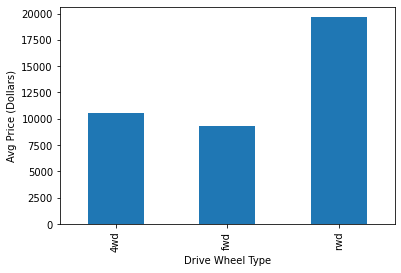

In [46]:
df_drivewheel_avg_price = data[['drive_wheels','price']].groupby("drive_wheels", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drive_wheels', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show()

#### Inference
 Cars with Rear wheel drive have a higher price value.

#### normalized_losses

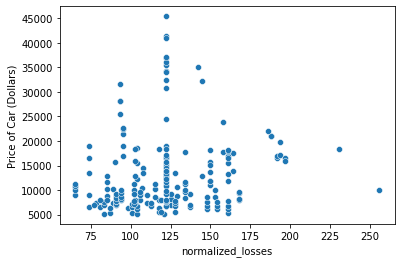

In [47]:
plt1 = sns.scatterplot(x = 'normalized_losses', y = 'price', data = data)
plt1.set_xlabel('normalized_losses')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Inference
- There is not much of a correlation with normalized_losses of the car with price.

#### Wheel Base

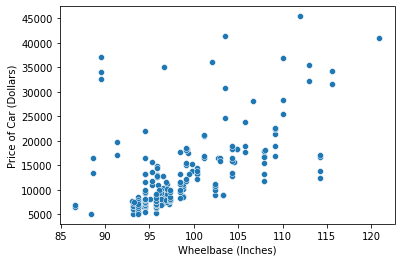

In [48]:
plt1 = sns.scatterplot(x = 'wheel_base', y = 'price', data = data)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

 Most cars has a wheel base around 95 inches.
 
 Price has a slight positive correlation with wheelbase.

#### Car Dimensions

Let's see how price varies with Car's length, width,height and weight.

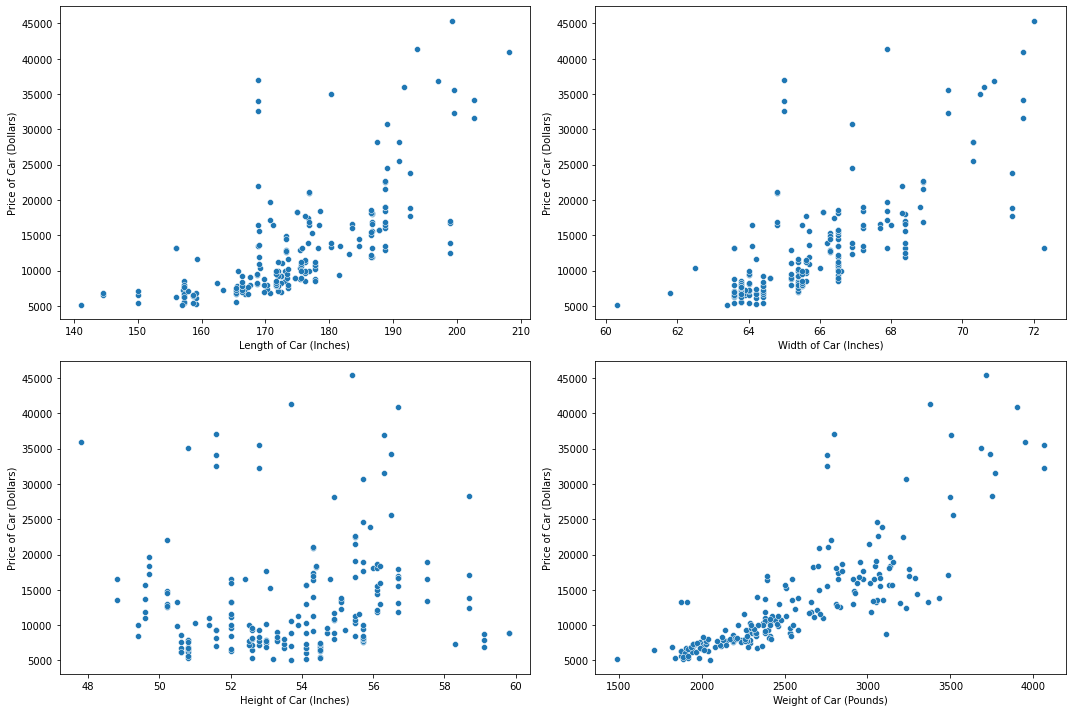

In [49]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'length', y = 'price', data = data, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'width', y = 'price', data = data, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'height', y = 'price', data = data, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curb_weight', y = 'price', data = data, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

#### Inference
- Length width and weight of the car is positively related with the price.
- There is not much of a correlation with Height of the car with price.

### Engine Specifications
#### Engine Type, Cylinder, Fuel System

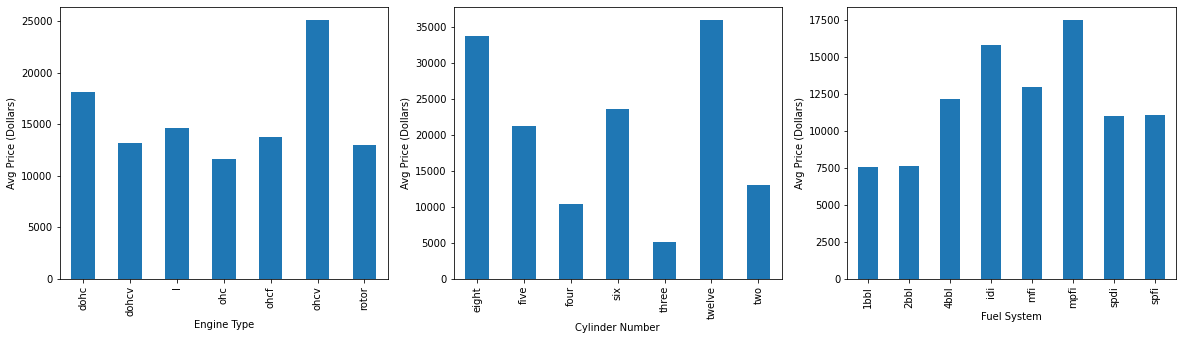

In [50]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = data[['engine-type','price']].groupby("engine-type", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'engine-type', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
#
df_cylindernumber_avg_price = data[['num-of_cylinders','price']].groupby("num-of_cylinders", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'num-of_cylinders', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
#
df_fuelsystem_avg_price = data[['fuel_system','price']].groupby("fuel_system", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuel_system', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show()

#### Inference
- DOHCV and OHCV engine types are priced high.
- Eight and twelve cylinder cars have higher price.
- IDI and MPFI fuel system have higher price.

Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio

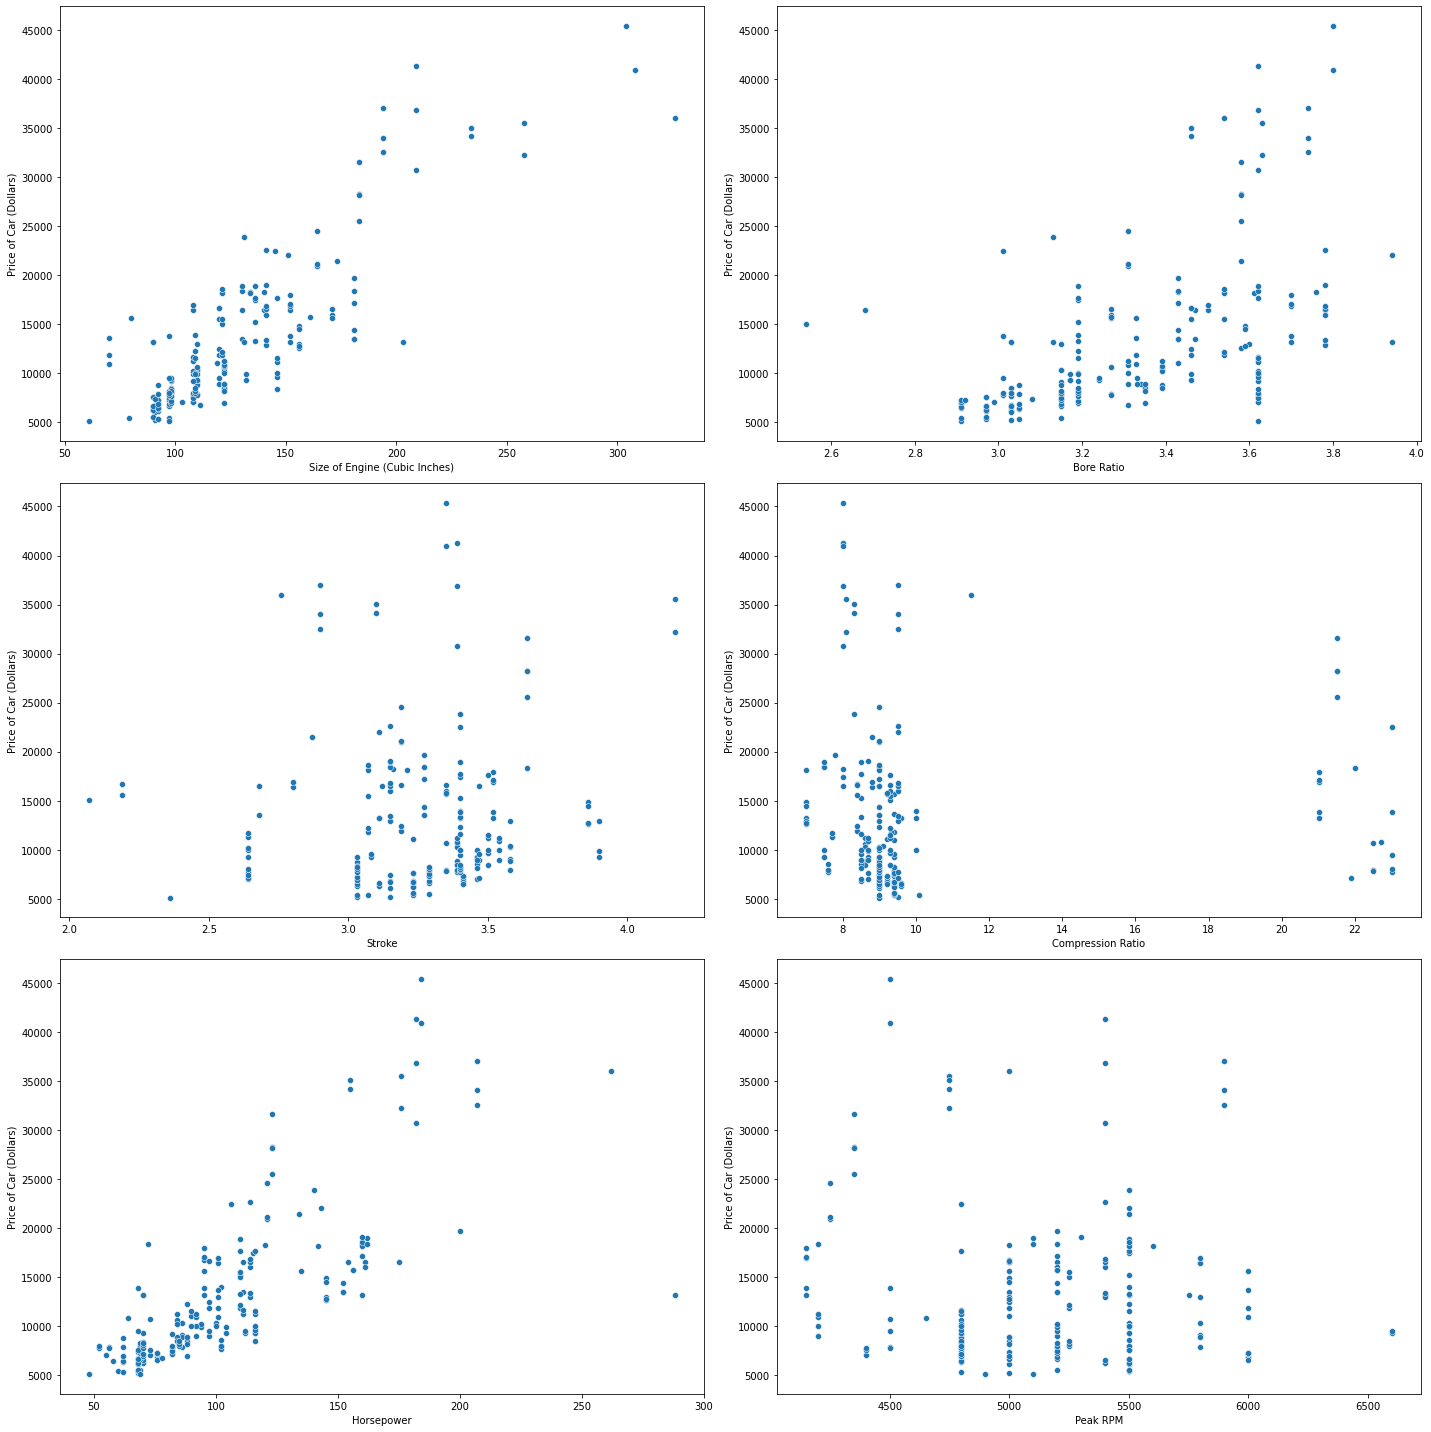

In [51]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'engine_size', y = 'price', data = data, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'bore', y = 'price', data = data, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = data, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compression_ratio', y = 'price', data = data, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = data, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peak_rpm', y = 'price', data = data, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

#### Inference
- Size of Engine, bore ratio, and Horsepower has positive correlation with price.

#### City Mileage & Highway Mileage

A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.

In [52]:
data['mileage'] = data['city_mpg']*0.55 + data['highway_mpg']*0.45

 Let's see how price varies with mileage.

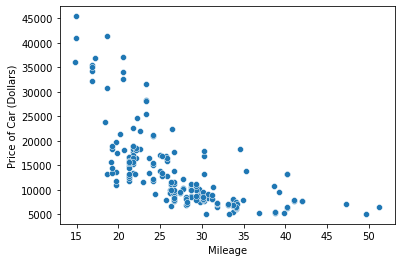

In [53]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Inference 
- Mileage has a negative correlation with price.

### Bivariate Analysis
#### Brand Category - Mileage
 It is expected that luxury brands don't care about mileage. Let's find out how price varies with brand category and mileage.

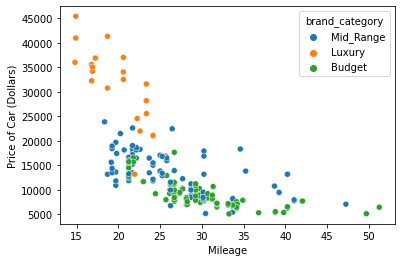

In [54]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Brand Category - Horsepower

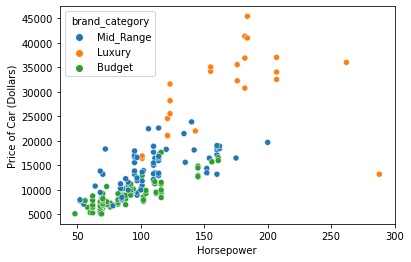

In [55]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Mileage - Fuel Type

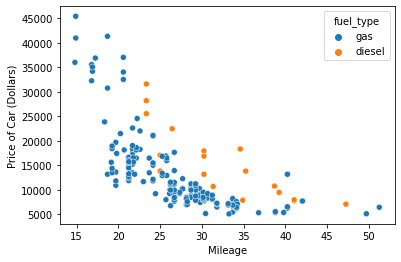

In [56]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fuel_type', data = data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Horsepower - Fuel Type

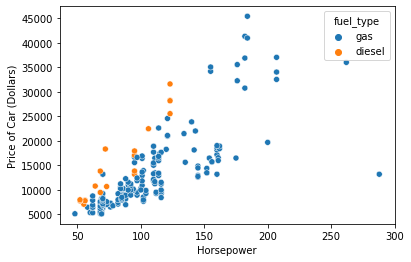

In [57]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fuel_type', data = data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Summary Univariate and Bivriate Analysis:
From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.
The most important driver variable for prediction of price are:-

1.Brand Category
2.Fuel Type
3.Aspiration
4.Car Body
5.Drive Wheel
6.Wheelbase
7.Car Length
8.Car Width
9.Curb weight
10.Engine Type
11.Cylinder Number
12.Engine Size
13.Bore Ratio
14.Horsepower
15.Mileage

### Linear Regression Model

In [58]:
auto = data[['fuel_type', 'aspiration', 'body-style', 'drive_wheels', 'wheel_base', 'length', 'width', 'curb_weight', 'engine-type',
       'num-of_cylinders', 'engine_size',  'bore', 'horsepower', 'price', 'brand_category', 'mileage']]

In [59]:
auto.head()

,fuel_type,aspiration,body-style,drive_wheels,wheel_base,length,width,curb_weight,engine-type,num-of_cylinders,engine_size,bore,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450,Mid_Range,19.80


### Visualising the Data
#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<Figure size 1080x1080 with 0 Axes>

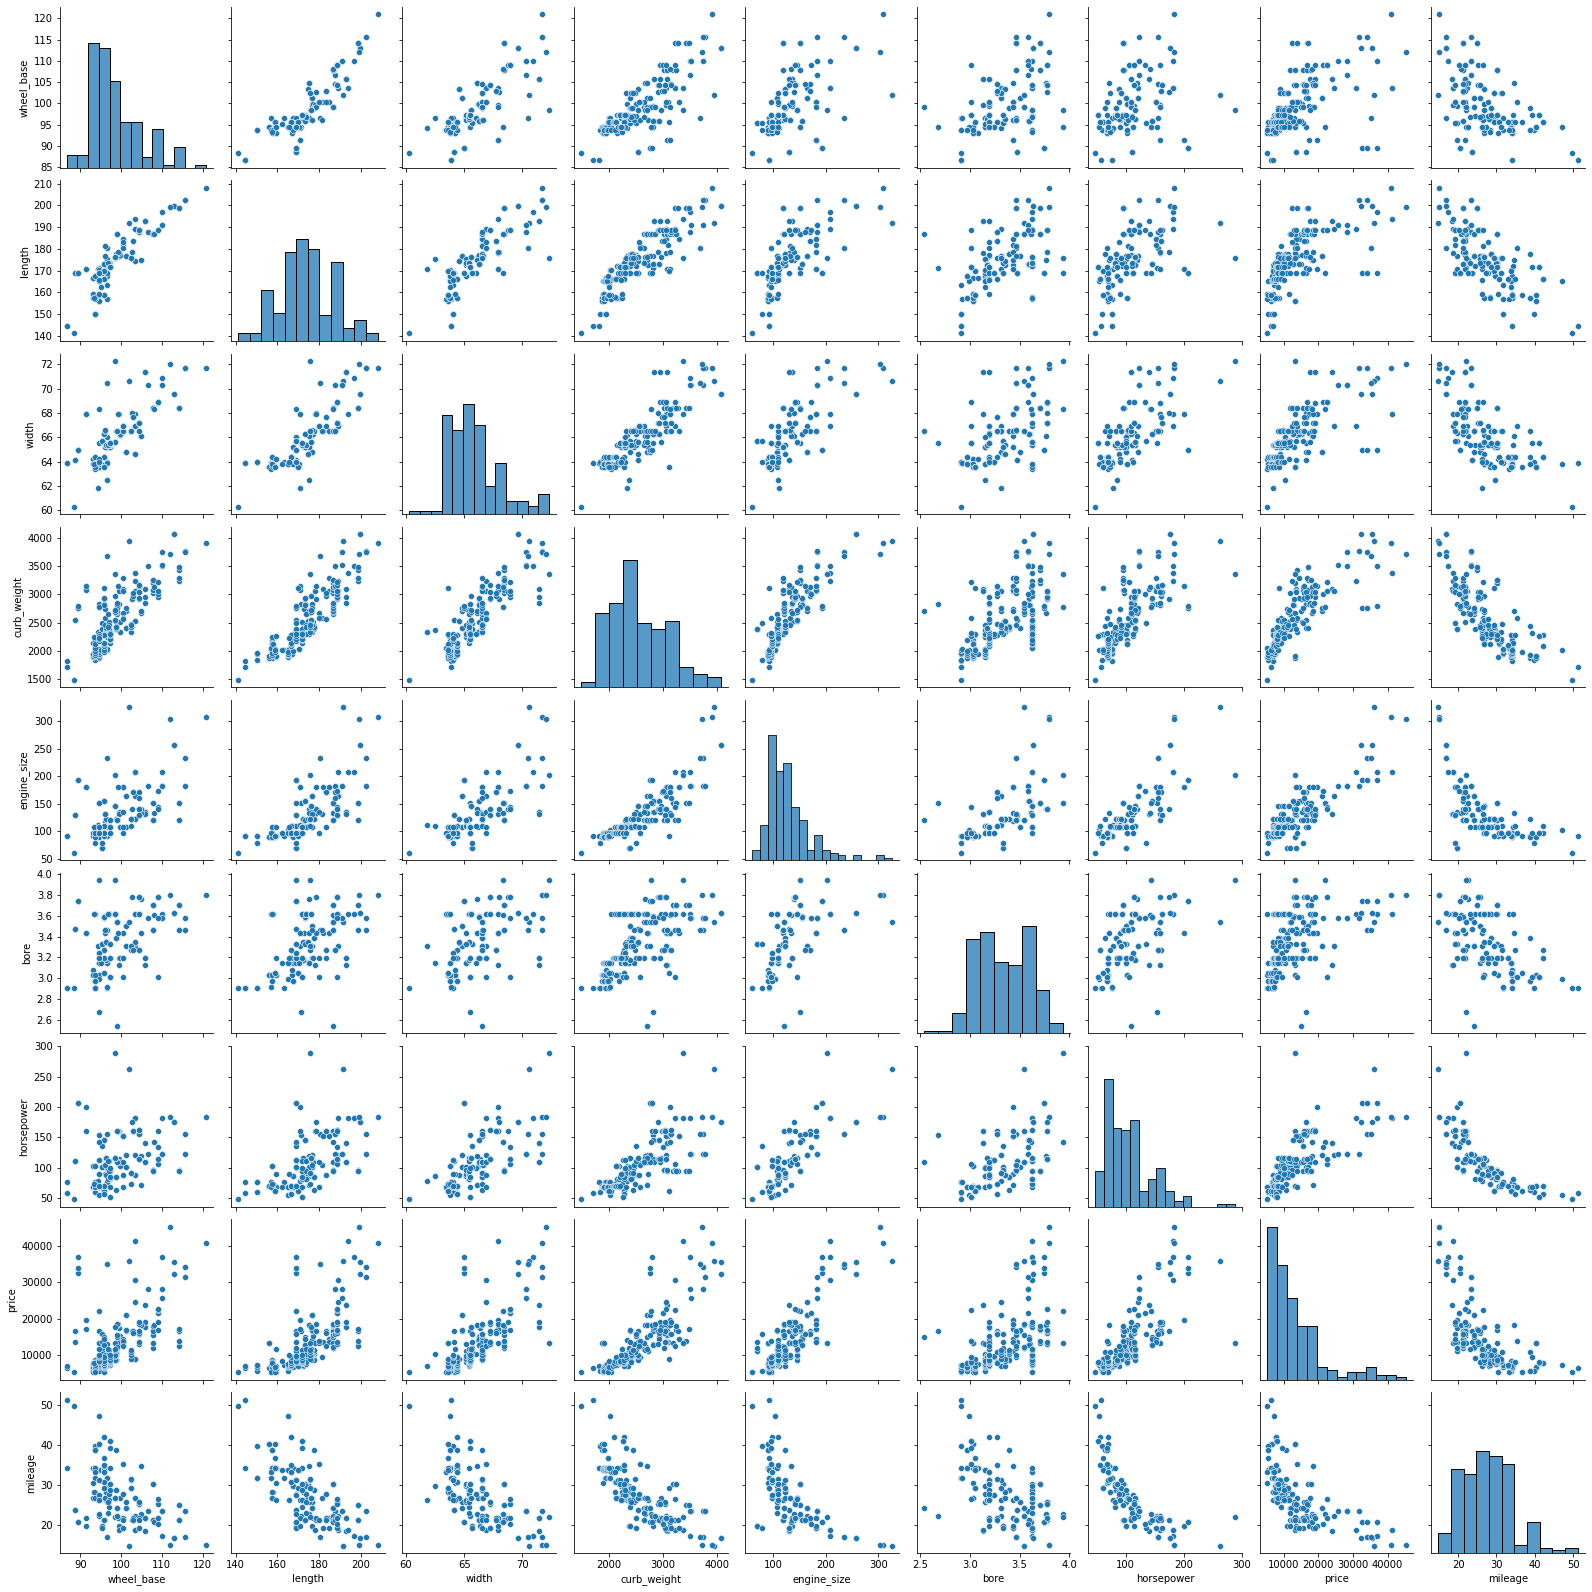

In [60]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

#### Visualising Categorical Variables
Let's make a boxplot for categorical variables.

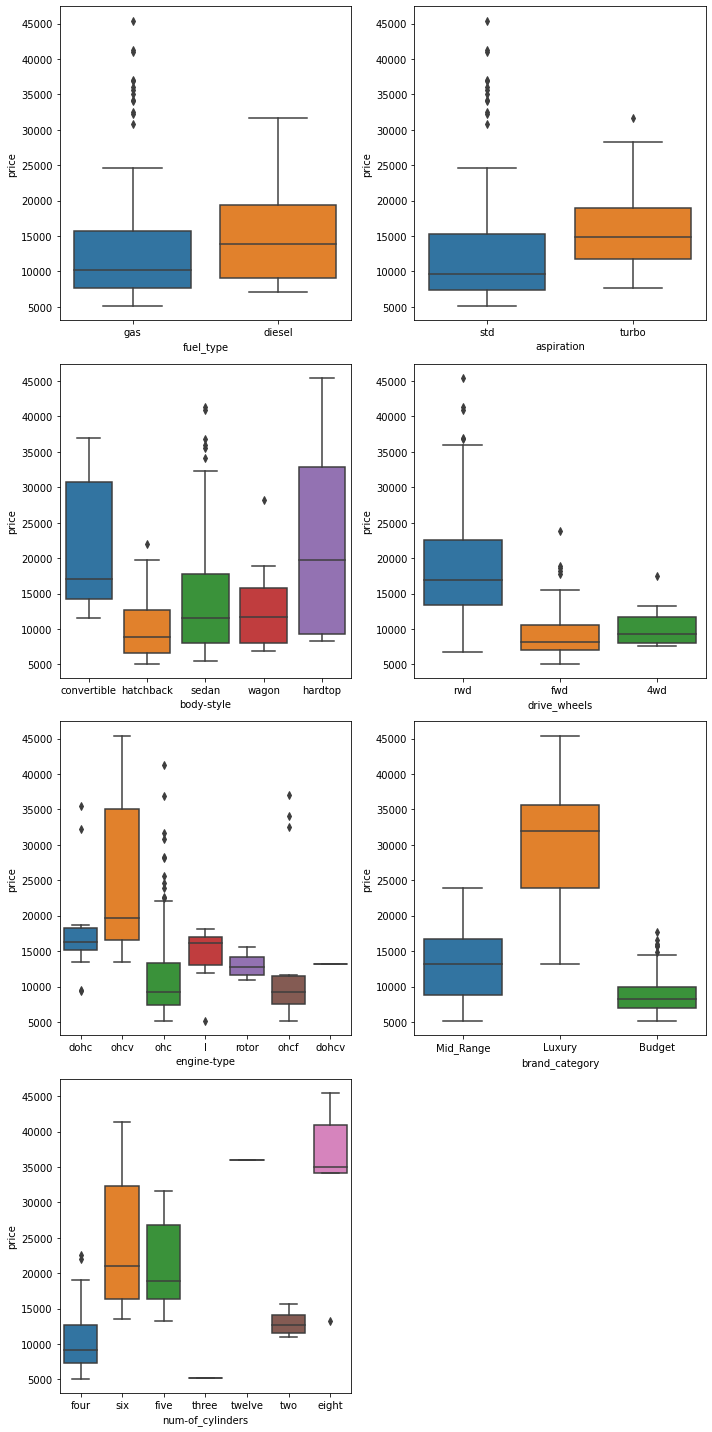

In [61]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fuel_type', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'body-style', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drive_wheels', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'engine-type', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'num-of_cylinders', y = 'price', data = auto)
plt.tight_layout()
plt.show()

### Data Preparation
#### Dummy Variables
Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [62]:
cyl_no = pd.get_dummies(auto['num-of_cylinders'], drop_first = True)

In [63]:
auto = pd.concat([auto, cyl_no], axis = 1)

In [64]:
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)

In [65]:
auto = pd.concat([auto, brand_cat], axis = 1)

In [66]:
eng_typ = pd.get_dummies(auto['engine-type'], drop_first = True)

In [67]:
auto = pd.concat([auto, eng_typ], axis = 1)

In [68]:
drwh = pd.get_dummies(auto['drive_wheels'], drop_first = True)

In [69]:
auto = pd.concat([auto, drwh], axis = 1)

In [70]:
carb = pd.get_dummies(auto['body-style'], drop_first = True)

In [71]:
auto = pd.concat([auto, carb], axis = 1)

In [72]:
asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

In [73]:
fuelt = pd.get_dummies(auto['fuel_type'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

In [74]:
auto.drop(['fuel_type', 'aspiration', 'body-style', 'drive_wheels', 'engine-type', 'num-of_cylinders','brand_category'], axis = 1, inplace = True)

### Model Building
#### Splitting the Data into Training and Testing sets

In [75]:
#X=auto.drop(['price'],axis=1)
#y=auto['price']

In [76]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
df_train.shape,df_test.shape

((143, 31), (62, 31))

#### Rescaling the Features
We will use min-max scaling

In [78]:
scaler=MinMaxScaler()

In [79]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheel_base', 'length', 'width', 'curb_weight', 'engine_size','bore', 'horsepower','mileage']

In [80]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [81]:
df_train.head()

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,7609,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,22018,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,9538,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,16500,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,18950,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


In [82]:
df_train.describe()

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497941,0.228118,12956.594406,0.358265,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165395,7626.718828,0.185980,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,7554.000000,0.198903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.195833,10345.000000,0.344307,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,15991.500000,0.512346,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41315.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


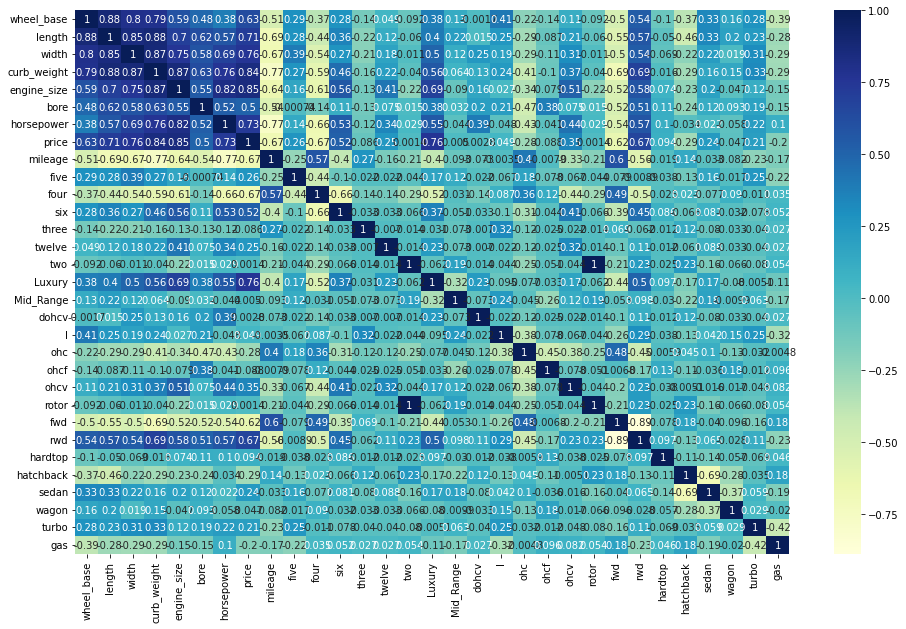

In [83]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Dividing into X and Y sets for the model building

In [84]:
X=df_train.drop(['price'],axis=1)
y=df_train['price']
X

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,mileage,five,four,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.530864,0,1,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.213992,0,1,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.344307,0,1,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.244170,0,1,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.122085,0,1,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.508943,0.425000,0.354926,0.184906,0.388889,0.283333,0.311385,0,1,...,0,0,1,0,0,0,1,0,1,1
103,0.475862,0.707317,0.516667,0.609775,0.452830,0.595238,0.433333,0.189300,0,0,...,1,0,1,0,0,0,1,0,0,1
67,0.806897,0.809756,0.833333,0.786268,0.460377,0.714286,0.312500,0.234568,1,0,...,0,0,0,1,0,0,1,0,1,0
24,0.244828,0.263415,0.291667,0.185803,0.109434,0.230159,0.083333,0.530864,0,1,...,0,0,1,0,0,1,0,0,0,1


### RFE
Recursive feature elimination

In [85]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X,y)

rfe = RFE(lm,step=10)             # running RFE
rfe = rfe.fit(X, y)

In [86]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('wheel_base', True, 1),
 ('length', False, 2),
 ('width', True, 1),
 ('curb_weight', True, 1),
 ('engine_size', False, 3),
 ('bore', False, 2),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 2),
 ('twelve', True, 1),
 ('two', False, 3),
 ('Luxury', True, 1),
 ('Mid_Range', False, 3),
 ('dohcv', True, 1),
 ('l', False, 3),
 ('ohc', False, 2),
 ('ohcf', False, 2),
 ('ohcv', False, 3),
 ('rotor', False, 3),
 ('fwd', False, 3),
 ('rwd', False, 3),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 3),
 ('gas', False, 3)]

In [87]:
col=X.columns[rfe.support_]
col

Index(['wheel_base', 'width', 'curb_weight', 'horsepower', 'mileage', 'five',
       'four', 'six', 'twelve', 'Luxury', 'dohcv', 'hardtop', 'hatchback',
       'sedan', 'wagon'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [88]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X[col]

In [89]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [90]:
lm = sm.OLS(y,X_train_rfe).fit()   # Running the linear model

In [91]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.67e-63
Time:                        20:23:08   Log-Likelihood:                -1297.1
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     127   BIC:                             2674.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5601.8984   1943.436      2.882      

#### Multicollinearity
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding  10 indicates high multicollinearity between this independent variable and the others

In [92]:
# Calculate the VIFs for the new model

X_ = X_train_rfe
def calc_vif(X_):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_.columns
    vif["VIF"] =[variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]

    return(vif)

In [93]:
calc_vif(X_train_rfe)

,variables,VIF
0,const,108.293926
1,wheel_base,7.304327
2,width,8.052386
3,curb_weight,12.648883
4,horsepower,11.454058
5,mileage,4.332533
6,five,2.433551
7,four,5.050132
8,six,4.623943
9,twelve,1.702261


In [94]:
#Droping the sedan column as p-value is high.
vif_dataset=X_train_rfe.copy()
vif_data= vif_dataset.drop(['sedan'],axis=1)

In [95]:
calc_vif(vif_data)

,variables,VIF
0,const,79.267732
1,wheel_base,5.688047
2,width,8.023097
3,curb_weight,11.118877
4,horsepower,11.073351
5,mileage,4.243510
6,five,2.383284
7,four,5.036247
8,six,4.550999
9,twelve,1.673708


In [96]:
#Droping the crub_weight column as p-value is high
vif_new_dataset=vif_data.copy()
vif_new_data= vif_new_dataset.drop(['curb_weight'],axis=1)

In [97]:
calc_vif(vif_new_data)

,variables,VIF
0,const,78.713540
1,wheel_base,4.514770
2,width,7.164096
3,horsepower,9.454712
4,mileage,4.176712
5,five,2.373075
6,four,5.031504
7,six,4.550710
8,twelve,1.672195
9,Luxury,1.727044


In [98]:
# Adding a constant variable 
X_train_lm = sm.add_constant(vif_new_data)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.26e-61
Time:                        20:23:15   Log-Likelihood:                -1307.5
No. Observations:                 143   AIC:                             2643.
Df Residuals:                     129   BIC:                             2684.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3032.3422   1767.484      1.716      0.0

In [99]:
#Droping the hourse_power column 
vif_new_dataset2=vif_new_data.copy()
vif_new_data2= vif_new_dataset2.drop(['horsepower'],axis=1)

In [101]:
calc_vif(vif_new_data2)

,variables,VIF
0,const,59.232512
1,wheel_base,3.879255
2,width,5.611635
3,mileage,2.220228
4,five,2.372716
5,four,5.000834
6,six,3.441602
7,twelve,1.242629
8,Luxury,1.688521
9,dohcv,1.414251


In [102]:
# Adding a constant variable 
X_train_lm = sm.add_constant(vif_new_data2)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     87.89
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           2.86e-56
Time:                        20:24:58   Log-Likelihood:                -1322.7
No. Observations:                 143   AIC:                             2671.
Df Residuals:                     130   BIC:                             2710.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7904.2632   1699.380      4.651      0.0

In [103]:
#Droping the wheelbase column  as p value is high
vif_new_dataset3=vif_new_data2.copy()
vif_new_data3= vif_new_dataset3.drop(['wheel_base'],axis=1)

In [104]:
# Adding a constant variable 
X_train_lm = sm.add_constant(vif_new_data3)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     96.45
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.14e-57
Time:                        20:37:29   Log-Likelihood:                -1322.9
No. Observations:                 143   AIC:                             2670.
Df Residuals:                     131   BIC:                             2705.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8021.0369   1674.436      4.790      0.0

In [105]:
calc_vif(vif_new_dataset3)

,variables,VIF
0,const,59.232512
1,wheel_base,3.879255
2,width,5.611635
3,mileage,2.220228
4,five,2.372716
5,four,5.000834
6,six,3.441602
7,twelve,1.242629
8,Luxury,1.688521
9,dohcv,1.414251


In [106]:
##Droping by four can see any changes
vif_new_dataset4=vif_new_data3.copy()
vif_new_data4= vif_new_dataset4.drop(['four'],axis=1)

In [107]:
calc_vif(vif_new_dataset4)

,variables,VIF
0,const,57.858204
1,width,2.552314
2,mileage,2.197303
3,five,2.372540
4,four,4.921793
5,six,3.360109
6,twelve,1.211000
7,Luxury,1.682130
8,dohcv,1.286992
9,hardtop,1.061530


In [108]:
# Adding a constant variable 
X_train_lm = sm.add_constant(vif_new_data4)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           9.84e-57
Time:                        20:43:07   Log-Likelihood:                -1326.7
No. Observations:                 143   AIC:                             2675.
Df Residuals:                     132   BIC:                             2708.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5517.4610   1422.811      3.878      0.0

In [109]:
##Droping by five can see any changes
vif_new_dataset5=vif_new_data4.copy()
vif_new_data5= vif_new_dataset5.drop(['five'],axis=1)

In [110]:
calc_vif(vif_new_data5)

,variables,VIF
0,const,39.521646
1,width,2.300271
2,mileage,2.082764
3,six,1.338021
4,twelve,1.101484
5,Luxury,1.603388
6,dohcv,1.177138
7,hardtop,1.060733
8,hatchback,1.238123
9,wagon,1.137066


In [111]:
# Adding a constant variable 
X_train_lm = sm.add_constant(vif_new_data5)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           9.55e-58
Time:                        20:45:31   Log-Likelihood:                -1326.8
No. Observations:                 143   AIC:                             2674.
Df Residuals:                     133   BIC:                             2703.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5565.6427   1411.350      3.943      0.0

In [112]:
##Droping by twelve can see any changes
vif_new_dataset6=vif_new_data5.copy()
vif_new_data6= vif_new_dataset6.drop(['twelve'],axis=1)

In [114]:
calc_vif(vif_new_data6)

,variables,VIF
0,const,39.491932
1,width,2.296699
2,mileage,2.069236
3,six,1.300716
4,Luxury,1.538190
5,dohcv,1.167844
6,hardtop,1.060223
7,hatchback,1.238114
8,wagon,1.135761


In [115]:
# Adding a constant variable 
X_train_lm = sm.add_constant(vif_new_data6)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.19e-58
Time:                        20:49:12   Log-Likelihood:                -1328.2
No. Observations:                 143   AIC:                             2674.
Df Residuals:                     134   BIC:                             2701.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5629.7756   1419.983      3.965      0.0

In [116]:
##Droping by wagon can see any changes
vif_new_dataset7=vif_new_data6.copy()
vif_new_data7= vif_new_dataset7.drop(['wagon'],axis=1)

In [117]:
calc_vif(vif_new_data7)

,variables,VIF
0,const,37.527009
1,width,2.283024
2,mileage,2.033869
3,six,1.299500
4,Luxury,1.514960
5,dohcv,1.165081
6,hardtop,1.052009
7,hatchback,1.119221


In [118]:
# Adding a constant variable 
X_train_lm = sm.add_constant(vif_new_data7)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           8.17e-59
Time:                        20:52:41   Log-Likelihood:                -1329.4
No. Observations:                 143   AIC:                             2675.
Df Residuals:                     135   BIC:                             2699.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5145.6442   1391.040      3.699      0.0

#### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [119]:
y_train_price = lm.predict(X_train_lm)

/home/sulochana/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

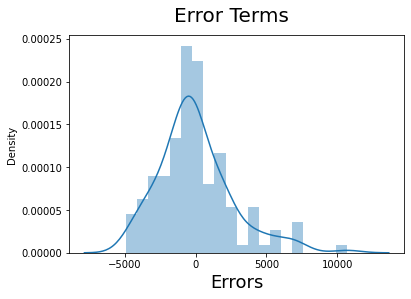

In [120]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions
Applying the scaling on the test sets

In [ ]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheel_base', 'length', 'width', 'curb_weight', 'engine_size','bore','price', 'horsepower','mileage']

In [122]:
## applying minmax() scaler
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [123]:
X_test=df_test.drop(['price'],axis=1)
y_test=df_test['price']
y_test

160     7738
186     8495
59      8845
165     9298
140     7603
       ...  
28      8921
29     12964
182     7775
40     10295
128    37028
Name: price, Length: 62, dtype: int64

In [126]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['width', 'mileage','six', 'Luxury','dohcv','hardtop', 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [127]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

In [129]:
r2_score(y_test, y_pred)

0.8599939667946432

In [131]:
#Let’s calculate the residual errors of regression ε = (y_test — y_pred):

def residual(model,feature,label):
    pred=model.predict(feature)
    df=pd.DataFrame({"Actual":label,"predicted":pred})
    df["residual"]=df["Actual"]-df["predicted"]
    return df

In [132]:
df_res=residual(lm,X_test_new,y_test)
df_res.head()

,Actual,predicted,residual
160,7738,7295.102586,442.897414
186,8495,10693.306362,-2198.306362
59,8845,11534.128607,-2689.128607
165,9298,8853.931456,444.068544
140,7603,7549.119562,53.880438


### Test for linearity

In [137]:
def test_linearity(model,X,y):
    df_res=residual(model,X,y)
    sns.lmplot(x="Actual",y="predicted",data=df_res,fit_reg=False,size=4)
    #plt.scatter(df_res["Actual"],df_res["predicted"])
    #sns.residplot(x="Actual",y="predicted",data=df_res)
    lim=np.arange(df_res.min().min(),df_res.max().max())
    # Plotting the diagonal line
    line_coords = np.arange(df_res.min().min(), df_res.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.plot(lim,lim,"r--")
    plt.title("test for linearity")
    plt.show()

/home/sulochana/miniconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


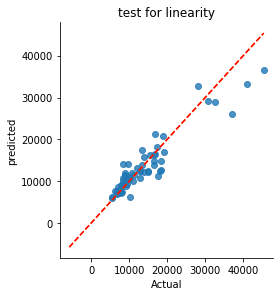

In [138]:
test_linearity(lm,X_test_new,y_test)

#### Mean of Residuals
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out

In [140]:
#residuals=residual(lm,X_test_new,y_test)
residuals= y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 365.47817785560613


#### Homoscedasity

In [141]:
def homoscedasity(model,X,y):
    df_result=residual(model,X,y)
    sns.residplot(x=df_result.index,y=df_result.residual)

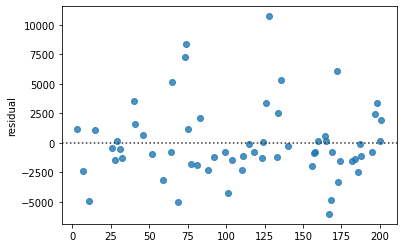

In [142]:
homoscedasity(lm,X_test_new,y_test)

##### Now we will be applying tests.
A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

#### Goldfeld Quandt Test
It compares variances of two subgroups; one set of high values and one set of low values. If the variances differ, the test rejects the null hypothesis that the variances of the errors are not constant.

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

- Null Hypothesis: Error terms are homoscedastic
- Alternative Hypothesis: Error terms are heteroscedastic.

In [143]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [144]:
f_val,p_val,ordering=het_goldfeldquandt(residuals,X_test_new)
p_val

0.9906734636629903

In [145]:
if p_val>0.05:
    print("homoscedasticity is present ")
else:
    print("Alternative (HA): Heteroscedasticity is present.")

homoscedasticity is present 


Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic.

#### Check for Normality of error terms/residuals

In [148]:
residual_normal=residual(lm,X_test_new,y_test)


In [156]:
#importing necessary libraries
import scipy.stats as stats
import pylab
#function to return plots for the feature
def normality(data):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

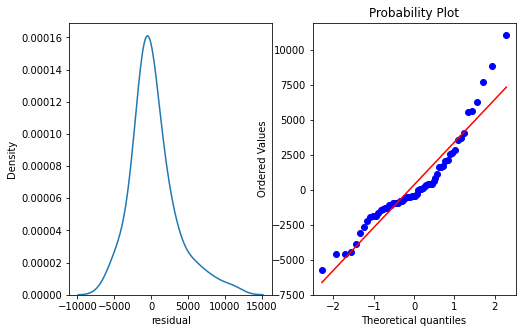

In [157]:
normality(residual_normal['residual'])

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal.

Performing the transformations on the predicted variable.

##### Logarithmic Transformation – 
This will convert the Price value to its log value i.e log(predicted)

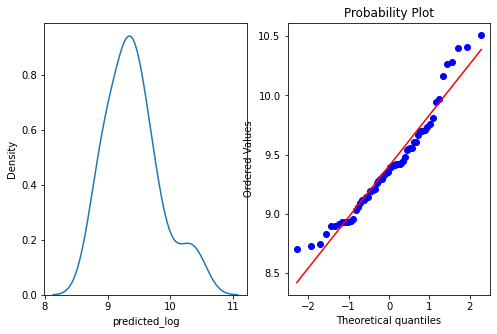

In [158]:
#performing logarithmic transformation on the feature
residual_normal['predicted_log']=np.log(residual_normal['predicted'])
#plotting to check the transformation
normality(residual_normal['predicted_log'])

#### Square Root Transformation –
This transformation will take the square root of the Price column i.e sqrt(Price).

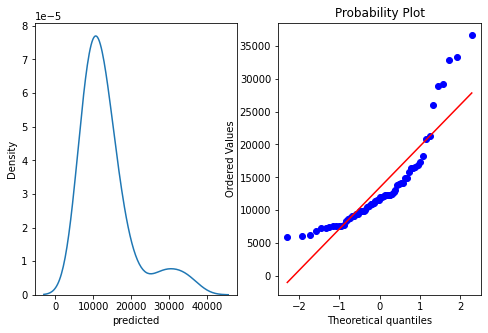

In [159]:
residual_normal['predicted_sqrt']=np.sqrt(residual_normal['predicted'])
normality(residual_normal['predicted'])

In [163]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = residual(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['residual'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(10, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['residual'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.379935812734453e-05
Residuals are not normally distributed


/home/sulochana/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


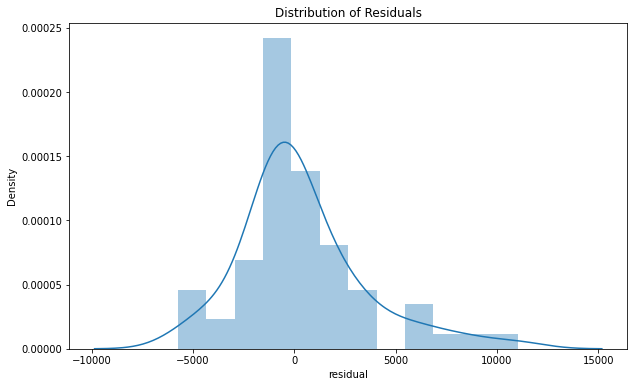


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [164]:
normal_errors_assumption(lm,X_test_new,y_test)